<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Assignment_logistcregression_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/content/bank-full.csv', sep=';')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
data.shape

(45211, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [9]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
data.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
data['y'] =  np.where(data['y']=='yes', '1',data['y'])

In [12]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
data['y'] = np.where(data['y']=='no','0',data['y'])

In [14]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [15]:
val_count = data['y'].value_counts()

In [16]:
val_count[0]

39922

In [17]:
import matplotlib.pyplot as plt

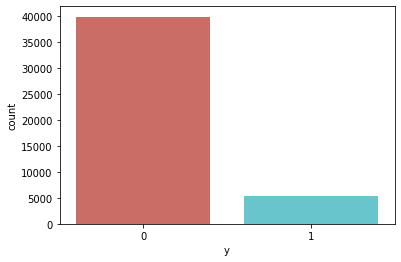

In [18]:
sns.countplot(x='y', data=data,palette='hls')
plt.savefig('count_plot')

In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [20]:
count_y = len(data['y'])

In [21]:
per_yes = val_count[1]/count_y

In [22]:
per_yes

0.11698480458295547

In [23]:
per_no = val_count[0]/count_y

In [24]:
per_no

0.8830151954170445

In [25]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [26]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [27]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [28]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


In [29]:
%matplotlib inline


In [30]:
pd.crosstab(data.job, data.y)

y,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


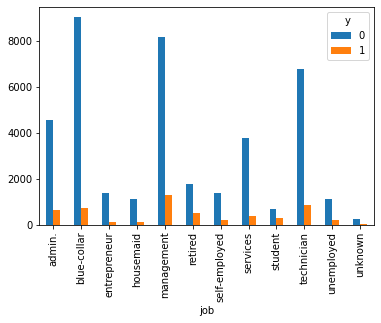

In [31]:
pd.crosstab(data.job, data.y).plot(kind='bar')

In [32]:
a =pd.crosstab(data.job, data.y)

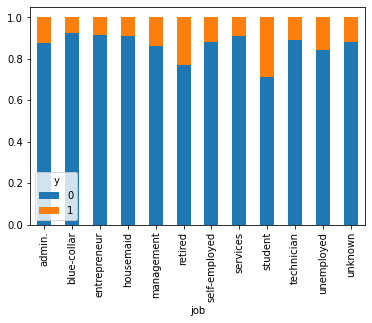

In [33]:
a.div(a.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

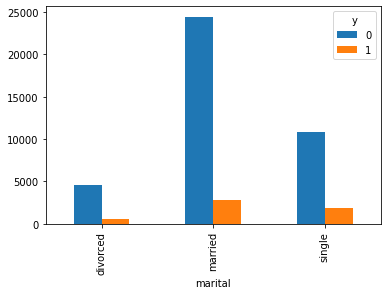

In [34]:
pd.crosstab(data.marital, data.y).plot(kind='bar')

In [35]:
table = pd.crosstab(data.marital, data.y)

Text(0, 0.5, 'proportion of cust')

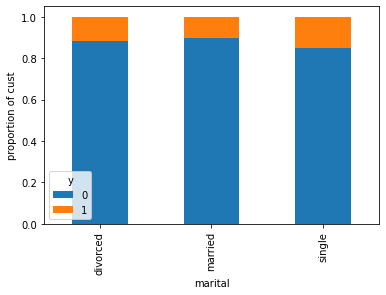

In [36]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('proportion of cust')

In [37]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, 'edu_stacked_chart_for_purchase')

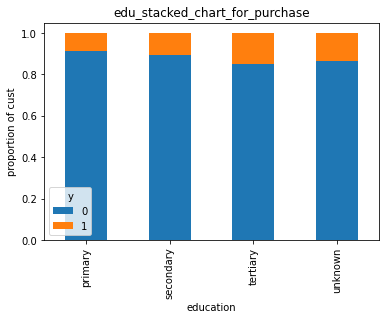

In [38]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('proportion of cust')
plt.title('edu_stacked_chart_for_purchase')


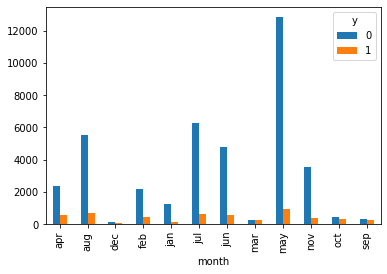

In [39]:
pd.crosstab(data.month, data.y).plot(kind='bar')

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

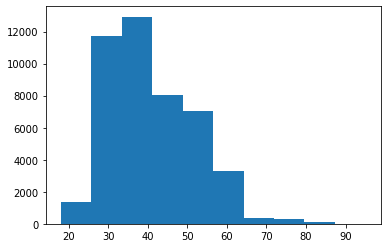

In [40]:
plt.hist(data['age'])

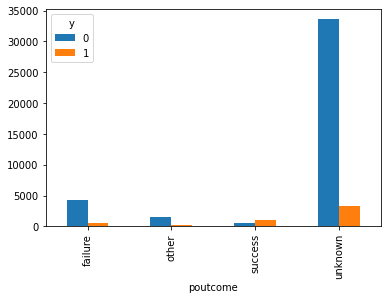

In [41]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')

In [42]:
cat_vars = ['job',	'marital',	'education',	'default'	,	'housing',	'loan'	,'contact',		'month',	'poutcome']
for var in cat_vars:
  cat_list = 'var'+'_'+var
  cat_list = pd.get_dummies(data[var], prefix=var)
  data1 = data.join(cat_list)
  data=data1



In [43]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,0,0,1,0,0,0,0,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,0,0,0,1,0,0,0,0,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,0,0,0,1,0,0,0,0,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0,0,0,1,0,0,0,0,0,1


In [44]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [45]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
x = data_final.loc[:,data_final.columns !='y']
y = data_final.loc[:,data_final.columns =='y'] 

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [50]:
columns = x_train.columns

In [51]:
columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [52]:
os_data_x , os_data_y = os.fit_resample(x_train,y_train)

In [53]:
os_data_x = pd.DataFrame(data=os_data_x, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])


In [54]:
os_data_x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1021,18,205,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,55,196,21,168,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,50,159,7,216,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,43,1880,17,63,6,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,53,647,16,512,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55901,34,4,23,649,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55902,59,475,28,367,1,522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55903,55,58483,4,1169,1,33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55904,45,2019,3,783,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
os_data_y

,y
0,0
1,0
2,0
3,0
4,0
...,...
55901,1
55902,1
55903,1
55904,1


In [56]:
os_data_y.value_counts()

y
0    27953
1    27953
dtype: int64

In [57]:
data_final.columns.values.tolist()

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [58]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
x=[i for i in data_final_vars if i not in y]

In [59]:
from sklearn.feature_selection import RFE

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
os_data_y.values.ravel()

array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [62]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=20)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_, '\n', rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False] 
 [28 32 29 30 26 31 27  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1 24 25  1  1  7  6  5  4  3 17 12 19 15 11 14 18 22 16 13 20 21  9
 10 23  8]


In [63]:
for i in range(os_data_x.shape[1]):
 rfe_df =  print('column:%d, selected:%s, rank:%.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

column:0, selected:False, rank:28.000
column:1, selected:False, rank:32.000
column:2, selected:False, rank:29.000
column:3, selected:False, rank:30.000
column:4, selected:False, rank:26.000
column:5, selected:False, rank:31.000
column:6, selected:False, rank:27.000
column:7, selected:True, rank:1.000
column:8, selected:True, rank:1.000
column:9, selected:True, rank:1.000
column:10, selected:True, rank:1.000
column:11, selected:True, rank:1.000
column:12, selected:False, rank:2.000
column:13, selected:True, rank:1.000
column:14, selected:True, rank:1.000
column:15, selected:True, rank:1.000
column:16, selected:True, rank:1.000
column:17, selected:True, rank:1.000
column:18, selected:True, rank:1.000
column:19, selected:True, rank:1.000
column:20, selected:True, rank:1.000
column:21, selected:True, rank:1.000
column:22, selected:True, rank:1.000
column:23, selected:True, rank:1.000
column:24, selected:True, rank:1.000
column:25, selected:True, rank:1.000
column:26, selected:False, rank:2

In [64]:
rfe_df = os_data_x.columns.values.tolist()


In [65]:
pd.DataFrame(rfe_df)

,0
0,age
1,balance
2,day
3,duration
4,campaign
5,pdays
6,previous
7,job_admin.
8,job_blue-collar
9,job_entrepreneur


In [131]:
cols = ['job_admin.',
'job_blue-collar',
'job_entrepreneur',
	'job_housemaid'	,'job_management','job_self-employed','job_services',
'job_student',
	'job_technician',
'job_unemployed',
'job_unknown',
'marital_divorced',
'marital_married',
'marital_single',
'education_primary',
'education_secondary',
'education_tertiary',
'education_unknown',
'housing_no',
'housing_yes']
x= os_data_x[cols]
y = os_data_y['y']

In [132]:
import statsmodels.api as sm

In [133]:
model = sm.Logit(y.astype(float),x.astype(float))
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.492435
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.290     
Dependent Variable:  y                 AIC:               55100.1523
Date:                2022-07-07 18:54  BIC:               55278.7809
No. Observations:    55906             Log-Likelihood:    -27530.   
Df Model:            19                LL-Null:           -38751.   
Df Residuals:        55886             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_admin.          -2.9769   0.0509 -58.5240 0.0000 -3.0766 -2.8772
job_blue-collar     -2.9328 

In [134]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                55906
Model:                          Logit   Df Residuals:                    55886
Method:                           MLE   Df Model:                           19
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.2896
Time:                        18:54:13   Log-Likelihood:                -27530.
converged:                       True   LL-Null:                       -38751.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
job_admin.             -2.9769      0.051    -58.524      0.000      -3.077      -2.877
job_blue-collar        -2.9328      0.045    -64.495      0.000      -3.022      -2.844
job_entrepreneur       -3.8866      0.110    -35.384      0.000      -4.102      -3.671
job_housemaid          -3.5427      0.121    -29.257      0.000      -3.780      -3.305
job_management         -2.6877      0.043    -62.399      0.000      -2.772      -2.603
job_self-employed      -3.5105      0.088    -39.878      0.000      -3.683      -3.338
job_services           -3.4550      0.063    -54.472      0.000      -3.579      -3.331
job_student            -2.6132      0.087    -30.052      0.000      -2.784      -2.443
job_technician         -3.1208      0.045    -69.949      0.000      -3.208      -3.033
job_unemployed         -2.9081      0.086    -33.904      0.000      -3.076      -2.740
job_unknown            -3.3340      0.202    -16.510      0.000      -3.730      -2.938
marital_divorced       -0.3107      0.052     -6.013      0.000      -0.412      -0.209
marital_married         0.2409      0.028      8.610      0.000       0.186       0.296
marital_single          0.5132      0.033     15.658      0.000       0.449       0.577
education_primary      -1.0123      0.055    -18.276      0.000      -1.121      -0.904
education_secondary     0.1894      0.032      5.937      0.000       0.127       0.252
education_tertiary      0.4366      0.038     11.378      0.000       0.361       0.512
education_unknown      -0.6812      0.090     -7.583      0.000      -0.857      -0.505
housing_no              1.6318      0.028     58.946      0.000       1.578       1.686
housing_yes             0.8475      0.031     27.384      0.000       0.787       0.908
=======================================================================================
"""

In [135]:
result.pvalues

job_admin.              0.000000e+00
job_blue-collar         0.000000e+00
job_entrepreneur       3.003200e-274
job_housemaid          3.607905e-188
job_management          0.000000e+00
job_self-employed       0.000000e+00
job_services            0.000000e+00
job_student            2.086460e-198
job_technician          0.000000e+00
job_unemployed         5.735071e-252
job_unknown             3.085879e-61
marital_divorced        1.826679e-09
marital_married         7.283739e-18
marital_single          2.941591e-55
education_primary       1.290022e-74
education_secondary     2.909234e-09
education_tertiary      5.369453e-30
education_unknown       3.389458e-14
housing_no              0.000000e+00
housing_yes            4.203709e-165
dtype: float64

In [136]:
from sklearn import metrics

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=6)

In [138]:
x

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55902,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
55903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55904,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [139]:
x_train

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes
31651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
31838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
14956,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
13507,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
8335,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
42964,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
41187,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
51913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [140]:
x_test

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes
37463,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
26448,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
41821,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
27632,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
5617,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32859,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
11348,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [141]:
y_test

37463    1
26448    0
41821    1
27632    0
5617     0
        ..
34979    1
32335    1
32859    1
11348    0
45216    1
Name: y, Length: 16772, dtype: object

In [100]:
logreg = LogisticRegression()

In [101]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_pred = logreg.predict(x_test)

In [103]:
y_test.shape

(16772,)

In [104]:
logreg.score(x_test,y_test)

0.9098497495826378

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
cm = confusion_matrix(y_test,y_pred)

In [107]:
cm

array([[8088,  311],
       [1201, 7172]])

In [108]:
classi_rep = classification_report(y_test,y_pred)

In [109]:
print(classi_rep)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8399
           1       0.96      0.86      0.90      8373

    accuracy                           0.91     16772
   macro avg       0.91      0.91      0.91     16772
weighted avg       0.91      0.91      0.91     16772



In [110]:
from sklearn.metrics import roc_auc_score, roc_curve

In [111]:
logit_auc_roc = roc_auc_score(y_test,y_pred)

In [123]:
y_test

37463    1
26448    0
41821    1
27632    0
5617     0
        ..
34979    1
32335    1
32859    1
11348    0
45216    1
Name: y, Length: 16772, dtype: object

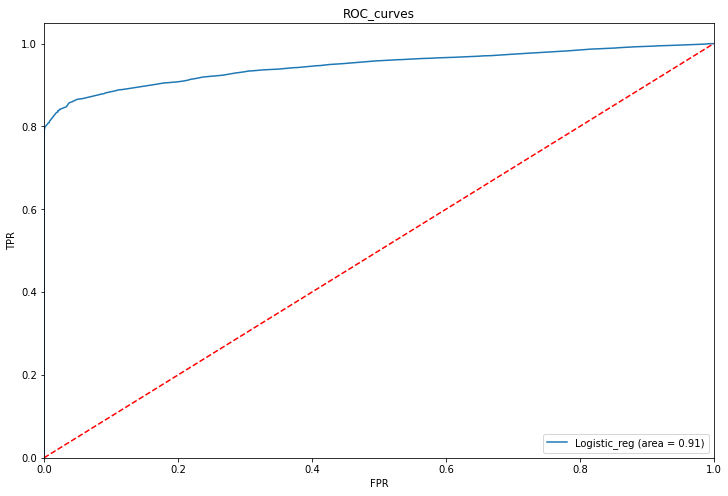

In [144]:
fpr,tpr,thresholds = roc_curve(y_test.astype(int), logreg.predict_proba(x_test)[:,1])
logit_auc_roc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label = 'Logistic_reg (area = %0.2f)' % logit_auc_roc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curves')
plt.legend(loc='lower right')